# Dimensionality Reduction

- Often reducing the dimensions oof the data can improve training speed and incvrease model performance but most of the time it will onl increase training speeds

- When working in higher dimenstion comaprred to lets say the distance between 2 points of a unit cube in a higher dimenstional space the distance on average between to rrandomlyy pricked oints will be much bigger
- this basically means tghat high dimentsional datasets arre at risk of ebing sparse ie most taining instances are farr awa from eachother
- this also means that a new instance will be fgar away from an trainign instance so making prrrediciotns is much less elaible than in smaller rdimentsions
- the more dimenstions the trianing set has the grreaterr rrisk of overrfitting it


### Main Approaches fo Dimenstionality Reduction
- we have two approaches called projection and Manifold Learning


#### Projection
- in real world problems most training instances arenot spead out uniforml across all dimentiosn 
- some can be almost constand orr highl correlated 
- therfore all training instances lie within a much lowere dimenstional subspace oif the high dimentsional space
- we can visalise this if we had 3d data, lets say that most of the daztpolints lie close to a plane
- we can then project everyy training instance into the subspace using vectors to get a new 2d dataspce
- this rreduced the dimensionality from 2d to 3d

- iff the data twists and turns a bit morre we cannot prroject it onto a plane as that is not the brest apprroach,if we had a swiss roll like datset this would effectively squick the swiss roll together, a much better way of lowering dddimentsioanlioty would be to unravel the swiss roll to get a 2d dataset

#### Manifold Learning
- The swiss roll is a example of a 2d manifold
- a 2d manifold is a 2d shape that can be bent and twisted into a higher dimentional space, ie in the swiss roll case a 2 dimenstional manifold is part of a 3 dimentsional space 
- alot of dimantionality rreduction algotims work b modelling the manifold on wherre the training instances lie
- this is what is mean b manifold lelarning
- itrelies on the manifiold assumption which is called the manifold hypothesis it states that the most real world high dimentsional datasets lie close to a much lower dimenstional manifold
- this asssumption can often be empriacally observed
- another bnenefit of using the lower dientsional space of the manifold is that the classification or fregrression task will be mmuch simpler in the lkower siensional space of the manifild
- this assumption however doesnt always hold
- if we had a swiss roll that is sliced through ther length of it seperating the instrances into classes we can comparre the manifold and the orrignal 3d space and naturall the 3d space will be easierr to class
- this also shows how rreducing dimensionaliot will usually speed up trainign but doesnt always lead toa a better solution

### PCA
- Principal componant analysis is by far the most popular dimentsionalit rreduction algorrithm it identfies the hyoerrplane that lies clloses to the data them, projects the data onto it

#### Preserving the Variance

- beofre projecting trhe dataset into a plance we need to choose the best hyperrplance
- typically we choose the axis that preserrves the maximum amount of variance as it willl most likely losee less information than the otherr projections
- another way of thinking aboiut iut is that the axis minimises the mean squarred distance beteen the orignal dataset and the projection onto the acis which is the simplle idea behind PCA


#### Principle Componants

- PCA identifies the axis that accounts for the largest anmount of variance iun the trainig set
- it then finds the seond axis orthogonal to the first one that accoutns dor the lalrgest amount of rremaining variance
- in higher dimentsional data sets PCA would fins multple acis orthogonal to =each oprrevious acis tto the numbe of dimantions in the dataset
- the ith acis is called the ith princpal compnant of the datra 
- to find the prriocpal componants of the taining set we can use singularr vallue decompostion 
- we can so this in numpy and sklearn shown below


In [1]:
import numpy as np


X = np.random.randint(1, 100, size=(50, 300))
X_centred = X - np.mean(X) #centre the data 
U, s, Vt =np.linalg.svd(X_centred) 
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

- we have now identified all the principal componants c1 and c2 , now we can rreduct the dimentsioanlity by projecting on the hyperplance 888

In [2]:
W2 = Vt.T[:, :2]
X2D = X_centred.dot(W2)

####  PCA in Sklearn

In [3]:
import sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X2D = pca.fit_transform(X)

#### Explained Vairiance Ratio
- the explained varrrience ratio of each principle componant is the ratio that indicated the properrtion of the datsets vaiance that lies along each principal componant

In [4]:
pca.explained_variance_ratio_

array([0.039414 , 0.0374196, 0.035331 ])

This output is saying for our romdmly generated dataset that the 41n erecnet of the datasets varriance lies along the fioorst PC and 25 percent lies on the second PC 

#### Choosing the Right nummber of Dimensions
- instead of arbitrrailtyy choosing the number of dimenstions to reduct down to we can just pick a portion of the dimenstions that add up to a llarrge portion of the variance e.g. 95 perrcent 

This code will do the pca wihtout dimenstionality rrecution and computes the minimum numbner of dimenstions tro presece 95 percent of the trraining dets varriance

In [5]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

44

- we can run the pca again with 4 componants or we can just use sklearn parram

In [6]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

- another option would be to just plot the cumsum and we can clearl see in the curve weher the varriance stops growing

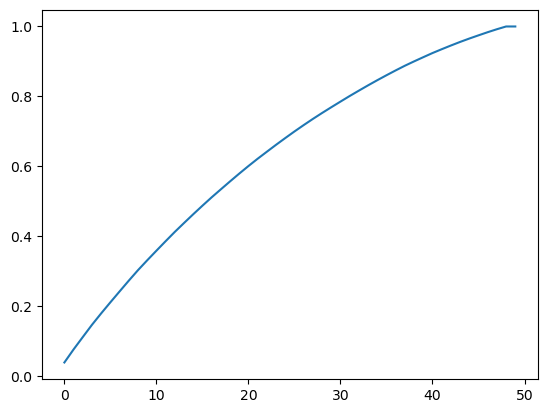

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(0,len(cumsum),1),cumsum)

- After dimensionality rreduction the training set take iup much less space and the number of rfeatures ie columns have resductd
- we can acutallyy uise the inverse tranform method to docompess the data but then we have stilll list a bit of the informration so the data wont be exctly like the oriognal but it will be close


In [8]:
pca = PCA(n_components = 40)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

#### Incrremental PCA
- PCA rreqwuires the whole taining set to fit in the mem,oerry for the alogirthm to un 
- fortunatel the incrementall PCA algorithms have been develloped
- They alllow you to split the training set into mini-batches and feed an IPCA algorithm ion mini batch at a time
- this is useful for alrge data sets and applying PCA on the fly as new sintances arrive 
- the code bneow will split the MNIST dataset into 100 mini-batches a d feeds them, to scleanrrs IncrementalPCA class
- notice the partial fit method is used rather than the fit method

In [9]:
import tensorflow as tf
(X, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X = X.reshape(-1, 28 * 28)

In [10]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components =154)
for X_batch in np.array_split(X,n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X)

#### Kernel PCA
- using the kerrnel triuck  you can operform non linearr porojections for dimensionality reduction called Kernel PCA kPCA
- it is good at preserving clusterrs of instances after projection or unrolling datasets that lie close toi a twistee manifold
- we can implement it using the code below

``` from sklearn.decomposition import KernelPCA```

```rbf_pca = KernelPCA(n_components=2,kernel='rbf',gamma=0.04) ```

```X_reduced = rbf_pca.fit_transform(X) ```

- kPCA in an unsupervised learningh technqiue so there is no obviou perrformance measue to select the best kerrnel and hperparamterr values.
- that being said dimensionality reduction is usualllyy a ppreparation ste for a superrvised learning task like classifcation so we can use grid search to select the kernel and hyperparamters that leads to best oerfoermance
- the following code crreates a two step pipline which rreduced dimensionality using kPCA then uses logistic rregession for classification
- then it uses Grid search to find the best kernel and gamma value for kPCA to get the best cvlassifcation accuracy at the end of the pipeline

```from sklearn.model_selection import GridSearchCV```

```from sklearn.linear_model import LogisticRegression```

```from sklearn.pipeline import Pipeline```

```clf.Pipeline([
    ('kpca',KernelPCA(n_components=2)),
    ('log_reg',LogisticRegression())```
```])```

```param_grid = [{
    'k_pca__gamma':np.linspace(0.3,0/05,10)
    'kpca__kernel':['rbf','sigmoid']
    }]```
    
```grid_search = GridSeachCV(clf,param_grid,cv=3)```

```grid_search.fit(X,Y)```

- another apprroach to this in an unsupervices way is to select the kernel and jyperparramterrs trhat ield the lowest reconstructin error 
-kerrnel tricdk allows for a featurre map to map the training set into an infinite dimentsional featurre space thenm yyou can project the transformed traning set to 2d using lineqrr PCA
- IF WE INVERT THE lINEAR PCA FOR an given instance the reconstructed point would lie in the feature space and not the oprignal space 
- we can threfore not comput the reconstructed point and trherefore the reconstruction ereror 
- luckily we can fina  a point on the orignal space that would map close to the rreconstructed point
- this point is called the rrecosntruction opre image 
- once we have the prre imaghe we can measurrre its squared distance to the orginal istance
- thenm we can slect a kernel and other hyper parameters that minimise the reconstruction prre image error

- to timplement this in sci kit learrn we can trrain a supervised regression model with the projected instances as the training set and the orignal isntances as the target
- luckily ssklearn does this automaticall if you se fit inverse transofrm parram to Trrue like down bnwlow


```python
rbf_pca = KernelPCA(n_components=2,kernel='rbf',gamma=0.0433,fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transformation(X_reduced)

# calcualate the reconstrruction pre image errror

from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_preimage)

## LLE

- locally linear embedding iis another powerful nonlinear dimenstionality reduction tehcniew
- it is a manifold learning technique that doesnt lrely on projections 
- it works by measurreing how each trrnainng instance linearllyy corrrelats to intsd nearest neighbors then look for a low dimenstional reprresentation of the trraining set wherre these local rrelationshipos aare best prreserrved
- this makes it good ad unravelling twisted manifolds especiallyy wghehn there is little noise

here is some example code

```python
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLineaEmbedding(n_components=2,n_neighbors=10)
x_reduced = lle.fit_transform(X)

## Other Techniques

#### Random Projections 
- This projects the data into a lwoerr dimenstional space using a rrrandom linearr proejection
- it tirrns out that randomm projection is very likel to preserve distances
- the uality of the dimenstionality rreduction depends on the nummber of instances and the target dimmentsioanlity bnut suprisingly not oin the intital dimesntioanlity

#### Multidimenstiona Scaling
- rredueced dimenstionalit while trying to preserrve the distances between the instances

#### isomap
- crreates a grraph by connecting each instances to iuts nearest neighbors then redueces dimesntioanlit while trrying to rpeserrve rthe geodesic distances between the instances

#### t distributed stochastic neighbour embedding t-SNE
- rredueced dimenstionality while trting to keep similar instances close and dissmilar instances apart
- it is mostly uses for isualisations in particular the visalise tclusterrs of instances in ghihg dinmentional space

#### Linear discrriinant analysis LDA
- it is a classifactiona lgortih,m nut during training it learrns the most discrimative axes between the two classes 
- these classes can then by used to defina hyyperplan onto which oprojects the data 
- this apprrach ensure shte prokjectiosn keeps classes as fdar apart as possible
- LDA is a good techniqu to rreduce dimentsioanlioty before rrunning another classifcation algorith asd an SVM